In [8]:
#importing from pandas 
import pandas as pd
#importing from numpy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns

In [15]:
#reading Data from the file
Data = pd.read_excel('Data_SVM.xlsx')
Data=Data.to_numpy(dtype=str)
for h in Data:
  h[0]=h[0].replace('\xa0','')
  h[0]=float(h[0])
  h[1]=h[1].replace('\xa0','')
  h[1]=float(h[1])
Data=np.array(Data,dtype=float)
#print(Data)

In [16]:
c=[]
d=[]
y=[]
for i in range(len(Data)):
  y.append(Data[i][2])
  c.append(Data[i][0])
  d.append(Data[i][1])
# plt.scatter(a,b,c=y) 

[-1.  1.]


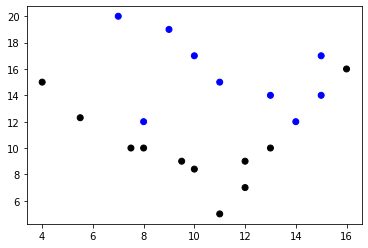

In [19]:
#plotting the graph
m=[]
n=[]
for i in range(len(Data)):
  n.append(Data[i][2])
  m.append([Data[i][0],Data[i][1]])
# print(p)
clf = SVC(kernel='linear')   
clf.fit(m,n)
y_pred = clf.predict([[8, 15],[7, 4]])
print(y_pred)
color = ['black' if c == 1 else 'blue' for c in y]
plt.scatter(c, d, c=color)

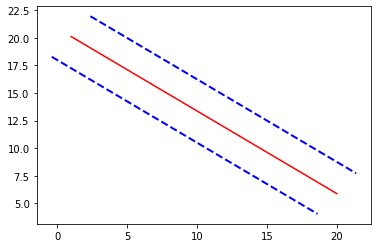

In [20]:
#plotting the line between them
w = clf.coef_[0]           
b = clf.intercept_[0]      
x_points = np.linspace(1, 20)    
y_points = -(w[0] / w[1]) * x_points - b / w[1]  
plt.plot(x_points, y_points, c='r');
w_hat = clf.coef_[0] / (np.sqrt(np.sum(clf.coef_[0] ** 2)))
margin = 1 / np.sqrt(np.sum(clf.coef_[0] ** 2))
hyperplane_points = np.array(list(zip(x_points,y_points)))
new_points_up   = hyperplane_points + w_hat * margin
new_points_down = hyperplane_points - w_hat * margin
plt.plot(new_points_up[:, 0], 
         new_points_up[:, 1], 
         'b--', 
         linewidth=2)# Green margin line below
plt.plot(new_points_down[:, 0], 
         new_points_down[:, 1], 
         'b--',
         linewidth=2)
plt.show()